In [1]:
import ib_insync.util as util
import matplotlib.pyplot as plt
from ib_insync import *

import nest_asyncio
nest_asyncio.apply()

# Enable inline plotting
%matplotlib inline

In [2]:
# Connect to IB TWS or IB Gateway (Ensure IB Gateway or TWS is running)
ib = IB()
ib.connect("127.0.0.1", 4002, clientId=2)

print("Connected:", ib.isConnected())  # Should print True if successful


Connected: True


In [3]:
# Define the contract (AAPL stock)
contract = Stock("AAPL", "SMART", "USD")


In [4]:
# Request historical data (1-minute bars for the last 1 day)
bars = ib.reqHistoricalData(
    contract,
    endDateTime="",
    durationStr="1 D",
    barSizeSetting="1 min",
    whatToShow="MIDPOINT",
    useRTH=True,
)

# Convert to DataFrame for easier analysis
df = util.df(bars)
df.head()  # Show the first few rows


,date,open,high,low,close,volume,average,barCount
0,2025-03-21 09:30:00-04:00,211.51,212.81,211.38,212.50,-1.0,-1.0,-1
1,2025-03-21 09:31:00-04:00,212.50,212.90,212.17,212.42,-1.0,-1.0,-1
2,2025-03-21 09:32:00-04:00,212.42,212.42,211.73,211.81,-1.0,-1.0,-1
3,2025-03-21 09:33:00-04:00,211.81,212.25,211.61,212.18,-1.0,-1.0,-1
4,2025-03-21 09:34:00-04:00,212.18,212.79,212.13,212.66,-1.0,-1.0,-1


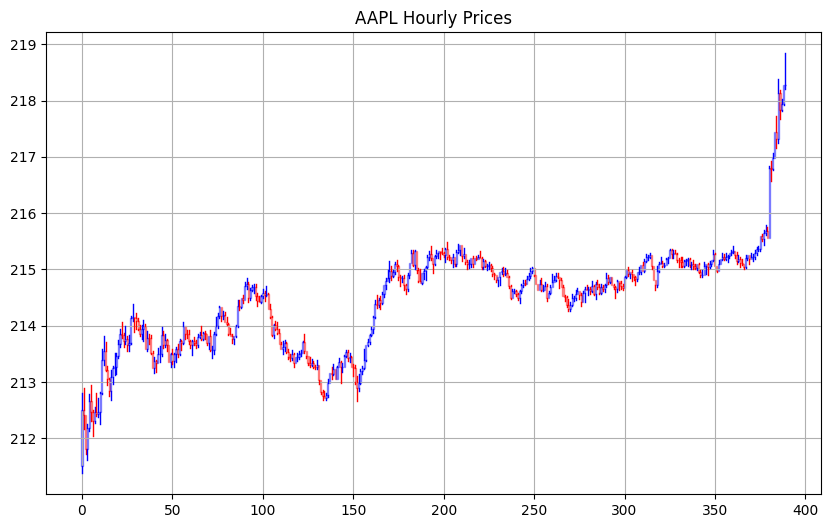

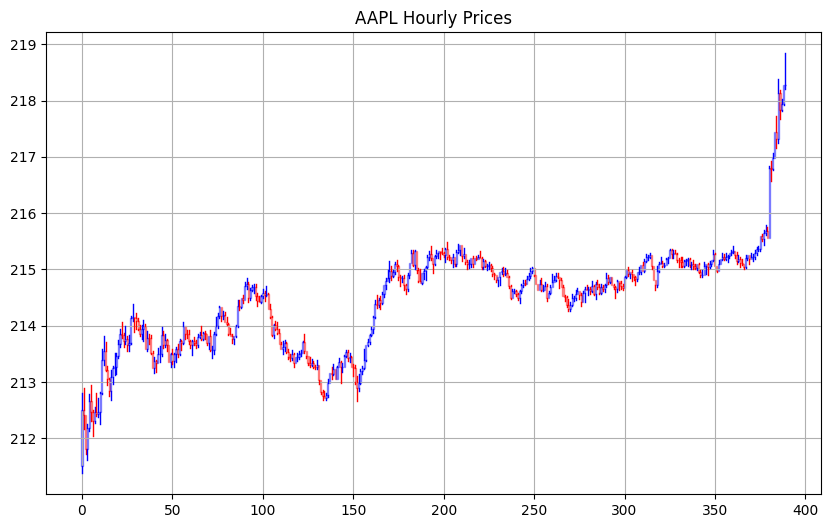

In [5]:
# Plot the fetched bars
util.barplot(bars, title="AAPL Hourly Prices")


In [6]:
ib.disconnect()
print("Disconnected:", not ib.isConnected())  # Should print True


Disconnected: True
